In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization,ReLU
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
!mkdir -p /content/drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path_data = "/content/drive/MyDrive/DPL302m/data/"

In [5]:
def get_images(directory):
    Images = []
    Labels = [] 
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == '00000': 
            label = 0
        elif labels == '10000':
            label = 1
        elif labels == '20000':
            label = 2
        elif labels == '50000':
            label = 3
        
        for image_file in os.listdir(directory+labels): 
            image = cv2.imread(directory+labels+r'/'+image_file) 
            if np.any(image != None):
              image = cv2.resize(image,(128,128)) 
              Images.append(image)
              Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) 

def get_classlabel(class_code):
    labels = {0:'00000', 1:'10000', 2:'20000', 3: '50000'}
    
    return labels[class_code]

In [6]:
data, label_data = get_images(path_data)

In [7]:
data = np.array(data)
label_data = np.array(label_data)

In [8]:
labels_name = ['00000', '10000', '20000','50000']

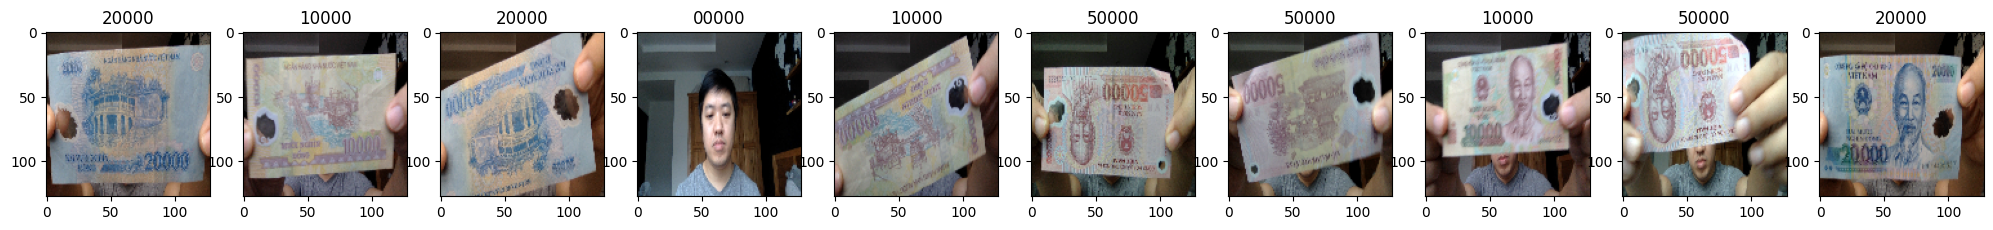

In [42]:
W_grid = 12
L_grid = 12

fig, axes = plt.subplots(1, 10, figsize = (25, 25))
axes = axes.ravel()

n_training = len(data)

for i in np.arange(0, 10):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(cv2.cvtColor(data[index],cv2.COLOR_BGR2RGB), cmap='gray')
    axes[i].set_title(labels_name[label_data[index]],fontsize=12)
 
    
plt.subplots_adjust(hspace = 0.4)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, label_data, random_state=0, train_size = 0.8)

In [11]:
img_train = X_train.astype('float32')/255.0
img_test = X_test.astype('float32')/255.0

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 4)

In [13]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [14]:
def conv_block(n_layers, n_filters):
  for i in range(n_layers):
    model.add(Conv2D(n_filters, (3,3), strides=(1,1), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(2,2))

model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1,1), padding = 'same', activation='relu', input_shape = (128,128,3)))
conv_block(1,64)
conv_block(2,128)
conv_block(3, 256)
conv_block(3, 512)
conv_block(3, 512)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu',))
model.add(keras.layers.Dense(4096, activation='relu',))
model.add(keras.layers.Dense(4, activation='softmax',))
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy',
                            optimizer=optimizer, metrics=['accuracy'])


In [15]:
history = model.fit(img_train,y_train, batch_size=32, epochs=25,validation_split=0.8)

Epoch 1/25
34/34 [==============================] - 33s 592ms/step - loss: 1.3568 - accuracy: 0.3003 - val_loss: 1.2728 - val_accuracy: 0.2988
Epoch 2/25
34/34 [==============================] - 15s 451ms/step - loss: 1.0512 - accuracy: 0.4621 - val_loss: 0.9322 - val_accuracy: 0.5373
Epoch 3/25
34/34 [==============================] - 15s 451ms/step - loss: 0.9255 - accuracy: 0.5201 - val_loss: 0.8882 - val_accuracy: 0.5183
Epoch 4/25
34/34 [==============================] - 15s 452ms/step - loss: 0.9003 - accuracy: 0.5023 - val_loss: 0.8475 - val_accuracy: 0.5781
Epoch 5/25
34/34 [==============================] - 15s 454ms/step - loss: 0.8447 - accuracy: 0.5538 - val_loss: 0.8477 - val_accuracy: 0.5193
Epoch 6/25
34/34 [==============================] - 10s 310ms/step - loss: 0.8418 - accuracy: 0.5575 - val_loss: 0.8219 - val_accuracy: 0.5735
Epoch 7/25
34/34 [==============================] - 15s 456ms/step - loss: 0.7679 - accuracy: 0.6324 - val_loss: 0.7757 - val_accuracy: 0.6249

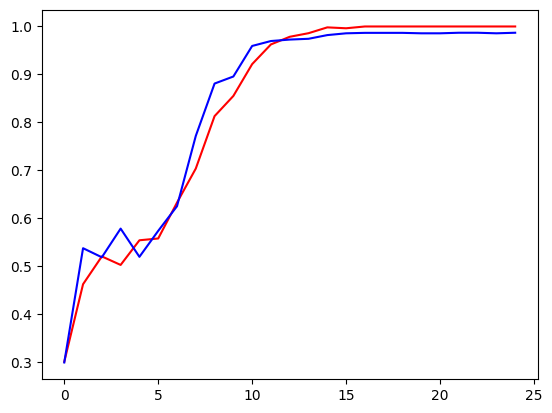

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, c='red')
plt.plot(val_accuracy, c='blue')

In [17]:
eval_result1 = model.evaluate(img_test, y_test)
print("[test loss, test accuracy]:", eval_result1)

42/42 [==============================] - 3s 81ms/step - loss: 0.1172 - accuracy: 0.9821
[test loss, test accuracy]: [0.11723974347114563, 0.9820627570152283]


In [18]:
predicted_classes = model.predict(img_test)

42/42 [==============================] - 2s 42ms/step


In [19]:
predicted_classes

array([[3.7946323e-11, 5.4517784e-07, 9.9999785e-01, 1.6048475e-06],
       [3.8936063e-17, 2.6201855e-08, 1.0000000e+00, 1.9788469e-11],
       [1.0000000e+00, 5.9663512e-17, 1.8804861e-16, 5.9071085e-17],
       ...,
       [1.3280051e-19, 8.5499119e-09, 1.0000000e+00, 2.3686597e-14],
       [5.4466176e-25, 9.9970645e-01, 2.9831815e-09, 2.9357010e-04],
       [7.2721427e-23, 9.9982882e-01, 3.1913348e-07, 1.7080088e-04]],
      dtype=float32)

In [30]:
img_test_10 = cv2.imread('/content/drive/MyDrive/DPL302m/10k.png')
img_test_20 = cv2.imread('/content/drive/MyDrive/DPL302m/20k.jpg')
img_test_50 = cv2.imread('/content/drive/MyDrive/DPL302m/50k.jpg')
img_test_no = cv2.imread('/content/drive/MyDrive/DPL302m/no.jpg')

In [31]:
test1 = cv2.resize(img_test_10,(128,128)).astype('float32')/255.0
test2 = cv2.resize(img_test_20,(128,128)).astype('float32')/255.0
test5 = cv2.resize(img_test_50,(128,128)).astype('float32')/255.0
testno = cv2.resize(img_test_no,(128,128)).astype('float32')/255.0

In [32]:
test1 = np.reshape(test1, (1,128,128,3))
test2 = np.reshape(test2, (1,128,128,3))
test5 = np.reshape(test5, (1,128,128,3))
testno = np.reshape(testno, (1,128,128,3))

In [33]:
predict1 = model.predict(test1)
predict2 = model.predict(test2)
predict3 = model.predict(test5)
predict4 = model.predict(testno)

1/1 [==============================] - 0s 18ms/step


In [34]:
predicted1=np.argmax(predict1,axis=1)
predicted2=np.argmax(predict2,axis=1)
predicted3=np.argmax(predict3,axis=1)
predicted4=np.argmax(predict4,axis=1)

In [35]:
image = np.array([img_test_10,img_test_20,img_test_50,img_test_no])

<ipython-input-35-2b4306d33c8c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image = np.array([img_test_10,img_test_20,img_test_50,img_test_no])


In [36]:
predicted_classes = np.array([predicted1,predicted2,predicted3,predicted4])

In [37]:
predicted_classes = np.reshape(predicted_classes, (4,))

In [38]:
predicted_classes

array([1, 2, 3, 0])

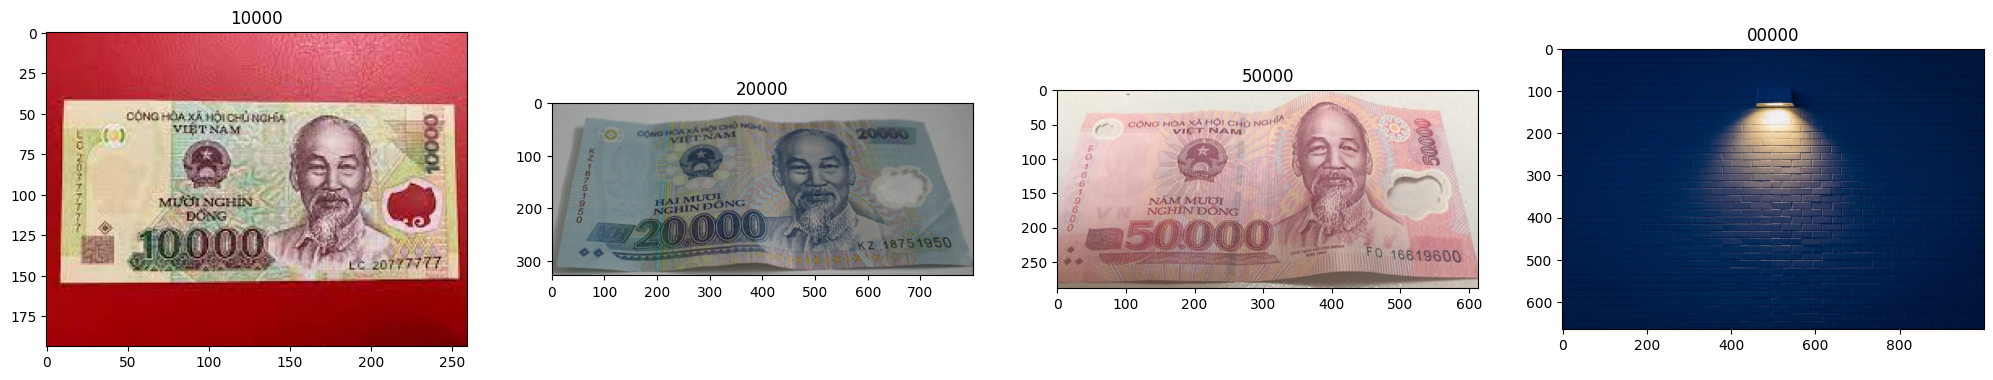

In [40]:
fig, axes = plt.subplots(1, 4, figsize = (25, 25))
axes = axes.ravel()


for i in np.arange(0, 4):
    axes[i].imshow(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels_name[predicted_classes[i]],fontsize=12)
 
    
plt.subplots_adjust(hspace = 0.4)